In [1]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Formátování a úpravy grafů

## Rozsah grafu

Rozsahy se nastavují pro každou osu souřadnic (objekt třídy `Axes`) pomocí metod `set_xlim` a `set_ylim`.

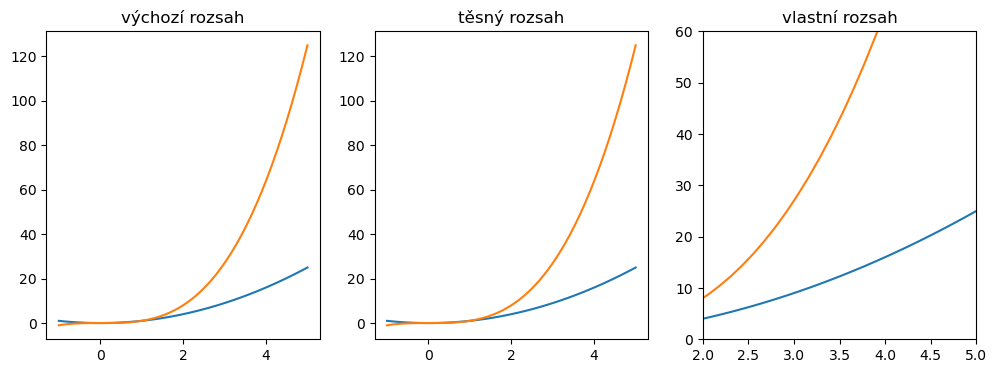

In [2]:
x = np.linspace(-1, 5, 50)

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("výchozí rozsah")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("těsný rozsah")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("vlastní rozsah");

# Logaritmická škála

K nastavení logaritmické škály slouží metody `set_xscale` a `set_yscale`.

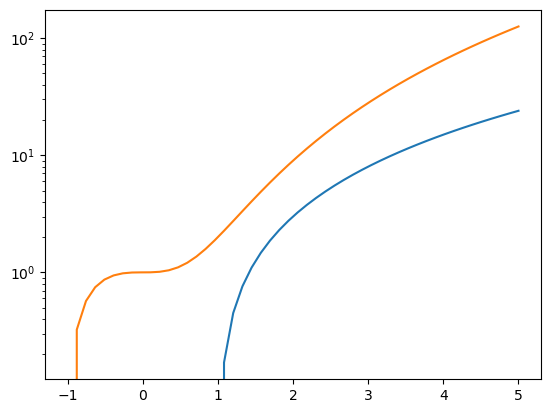

In [3]:
fig, ax = plt.subplots(1, 1) 

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
# ax.set_xscale("log")

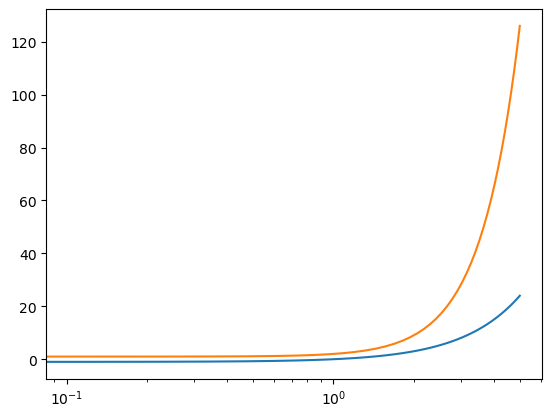

In [4]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2 - 1, x, x**3 + 1)
# ax.set_yscale("log")
ax.set_xscale("log")


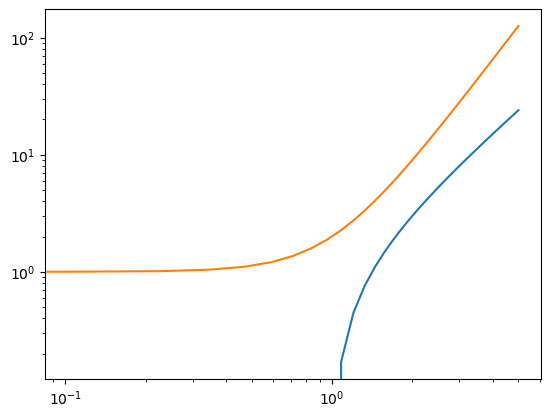

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, x**2 - 1, x, x**3 + 1)
ax.set_yscale("log")
ax.set_xscale("log")


### Velikost obrázku, rozlišení

Ve chvíli, kdy vytváříme graf, můžeme mu nastavit velikost a rozlišení. Jupyter Notebook si s tím zachází lehce po svém (a ručí vlastně akorát za poměr stran), ale exportujete-li obrázky do vektorových či bitmapových formátů, můžete specifikovat přesnou velikost v palcích (`figsize`) a rozlišení v dpi neboli bodech na palec (`dpi`). Oba argumenty se při vytváření obrázku předávají funkci `figure` jako "keyword" argumenty:

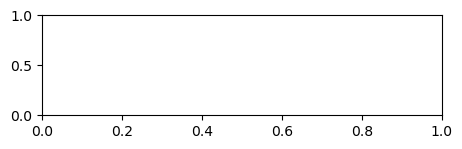

In [6]:
# Obrázek o velikost 4x1 palce s rozlišením 100 dpi
fig = plt.figure(figsize=(4, 1), dpi=100)
axes = fig.add_axes([0,0,1,1])

Argumenty lze předat i správcům rozložením, jako je např. fuknce `subplots`.

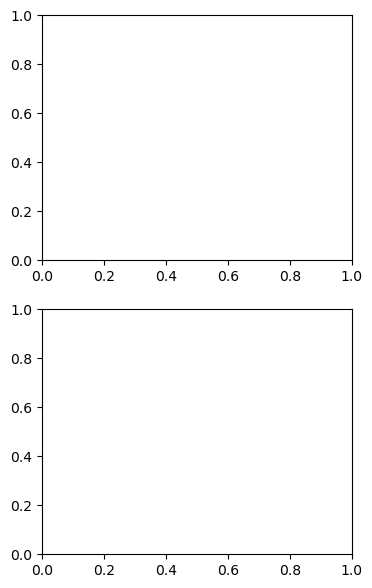

In [7]:
# Dva grafy pod sebou, které dohromady zaujímají obdélník 4x7 palců
fig, axes = plt.subplots(2, 1, figsize=(4, 7), dpi=100)

# Formátování textu

Každý textový objekt (popisek osy, legenda, titulek grafu, poznámky, ..., zkrátka instance třídy `Text`) má spoustu parametrů, které lze specifikovat. Celý výčet vlastností najdete v dokumentaci: [Zde](http://matplotlib.org/api/artist_api.html).

Pro nás budou (kromě barev) podstatné parametry `fontsize` (velikost v bodech) a `family` (název nebo druh fontu). `family` akceptuje jméno existujícího fontu nebo název kategorie:

* `serif` - patkové písmo
* `sans-serif` - bezpatkové písmo (výchozí)
* `monospace` - písmo s pevnou šířkou
* ... jsou i další, viz dokumentace [Zde](http://matplotlib.org/users/customizing.html)

Pomocí `style="italic"` můžeme nastavit kurzívu, pomocí `weight="bold"` tučné písmo (tlouštěk je hned několik, viz dokumentace).



Text(0.5, 1.0, 'serif (+ italic)')

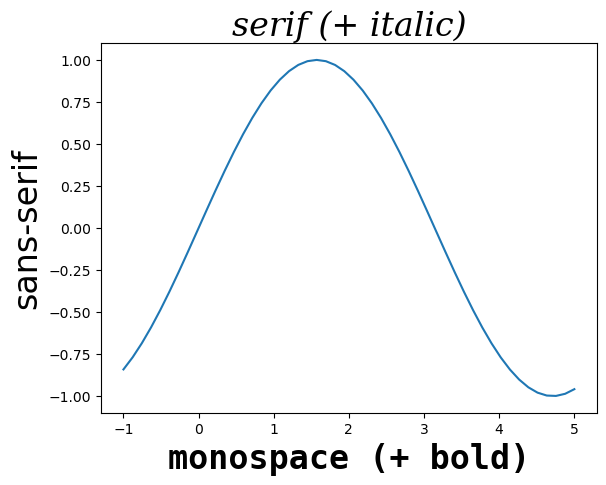

In [8]:
fig, ax = plt.subplots()

ax.plot(x, np.sin(x))
ax.set_xlabel('monospace (+ bold)', family="monospace", fontsize=24, weight="bold")
ax.set_ylabel('sans-serif', family="sans-serif", fontsize=24)
ax.set_title('serif (+ italic)', family="serif", fontsize=24, style="italic")


# Podpora $\LaTeX \text{u}$

Matplotlib nabízí výbornou podporu $\LaTeX \text{u}$. Jakýkoliv text můžeme (ostatně, totéž nabízí i Jupyter Notebook!) obklopit dvěma znaky dolaru a matplotlibu tak řekneme, že jej má interpretovat jako Latexový zdroják. Například napíšeme `"$y=x^3$"` a dostaneme $y=x^3$. To můžeme použít v `set_xlabel`, `set_ylabel`, `set_title` i kdekoliv jinde.

Pokud ale chceme vkládat příkazy LaTeXu, které začínají na zpětné lomítko `\`, musíme si dát pozor, abychom ho správně vložili. Python totiž standardně zpětné lomítko slouží pro escape sekvence. Musíme tedy buď všechna lomítka zdvojit, nebo použít tzv. raw stringy ("syrové řetězce"), které se píší s `r` před uvozovkami a escape sekvence ignorují: `r"\alpha"` nám vyprodukuje $\alpha$.

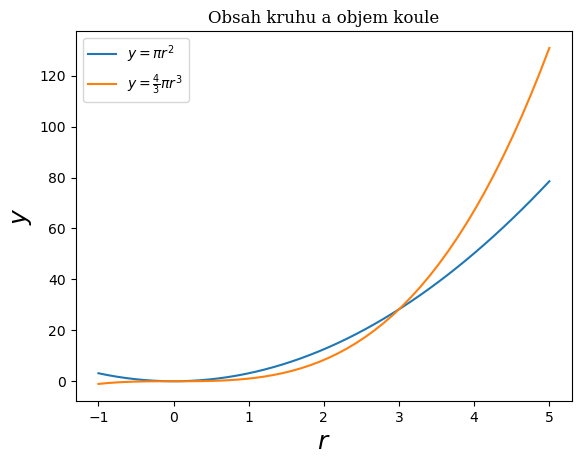

In [9]:
fig, ax = plt.subplots()

ax.plot(x, math.pi * x**2, label=r"$y = \pi r^2$")
ax.plot(x, 1.0 / 3 * math.pi * x**3, label=r"$y = \frac{4}{3}\pi r^3$")
ax.set_xlabel(r'$r$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Obsah kruhu a objem koule', family="serif")
ax.legend(loc=2);     # Použití legendy viz dále